In [3]:
import glob
import jsonlines
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])
import warnings
warnings.filterwarnings("ignore")

In [156]:
lang2name = {
    'en': 'ENG',
    'ar': 'ARB',
    'be': 'BEL',
    'bg': 'BUL',
    'da': 'DAN',
    'et': 'EST',
    'de': 'DEU',
    'el': 'ELL',
    'fr': 'FRA',
    'id': 'IND',
    'ja': 'JPN',
    'ko': 'KOR',
    'zh': 'CMN',
    'pt': 'POR',
    'ru': 'RUS',
    'es': 'SPA',
    'sw': 'SWA',
    'ta': 'TAM',
    'tr': 'TUR',
    'vi': 'VIE',
}

In [14]:
dset_fn = "../dataset_dir/XVNLI/annotations/"
langs = ['en', 'ar', 'es', 'fr', 'ru']
shots = [1, 5, 10, 20, 25, 48]

In [12]:
with jsonlines.open(dset_fn + "en/train.jsonl") as reader:
    train = [item for item in reader]
    
with jsonlines.open(dset_fn + "en/dev.jsonl") as reader:
    dev = [item for item in reader]

dev[0]

{'Flikr30kID': '4971935706',
 'annotator_labels': ['neutral'],
 'captionID': '4971935706.jpg#0',
 'gold_label': 'neutral',
 'pairID': '4971935706.jpg#0r1n',
 'sentence1': 'A older man and two boys (both wearing orange) are sitting, with feet dangling, over an alligator infested reservoir.',
 'sentence1_binary_parse': '( ( ( ( ( A ( older man ) ) and ) ( two boys ) ) ( -LRB- ( ( both ( wearing orange ) ) -RRB- ) ) ) ( ( are ( ( ( sitting , ) ( with feet ) ) ( ( dangling , ) ( over ( an ( alligator ( infested reservoir ) ) ) ) ) ) ) . ) )',
 'sentence1_parse': '(ROOT (S (NP (NP (NP (DT A) (JJR older) (NN man)) (CC and) (NP (CD two) (NNS boys))) (PRN (-LRB- -LRB-) (NP (DT both) (S (VP (VBG wearing) (NP (NN orange))))) (-RRB- -RRB-))) (VP (VBP are) (VP (VBG sitting) (, ,) (PP (IN with) (NP (NNS feet))) (S (VP (VBG dangling) (, ,) (PP (IN over) (NP (DT an) (NN alligator) (NN infested) (NN reservoir))))))) (. .)))',
 'sentence2': 'The man and his sons are fishing off a bridge.',
 'sentence2_

In [15]:
lang2test = {}
for lang in langs:
    with jsonlines.open(dset_fn + f"{lang}/test.jsonl") as reader:
        lang2test[lang] = [item for item in reader]
    
lang2few = defaultdict(dict)
for lang in langs:
    for shot in shots:
        with jsonlines.open(dset_fn + f"{lang}/train_{shot}.jsonl") as reader:
            lang2few[lang][shot] = [item for item in reader]

## Label distribution

In [103]:
train_labels = [e['gold_label'] for e in train]
dev_labels = [e['gold_label'] for e in dev]
lang2test_labels = {lang: [e['gold_label'] for e in l] for lang, l in lang2test.items()}
lang2few_labels = {lang: {s: [e['gold_label'] for e in l] for s, l in d.items()} for lang, d in lang2few.items()}

In [104]:
xs = ['train', 'dev', 'test'] + ['1 shot'] + [f'{s} shots' for s in shots[1:]]
label2counts = {
    'entailment': [],
    'neutral': [],
    'contradiction': [],
}
for l in [train_labels, dev_labels, lang2test_labels['en']]:
    for label in label2counts:
        elems = [e for e in l if e == label]
        label2counts[label].append(len(elems))

for l in lang2few_labels['en'].values():
    for label in label2counts:
        elems = [e for e in l if e == label]
        label2counts[label].append(len(elems))

In [105]:
label2counts['neutral']

[179850, 6014, 381, 2, 7, 14, 24, 29, 53]

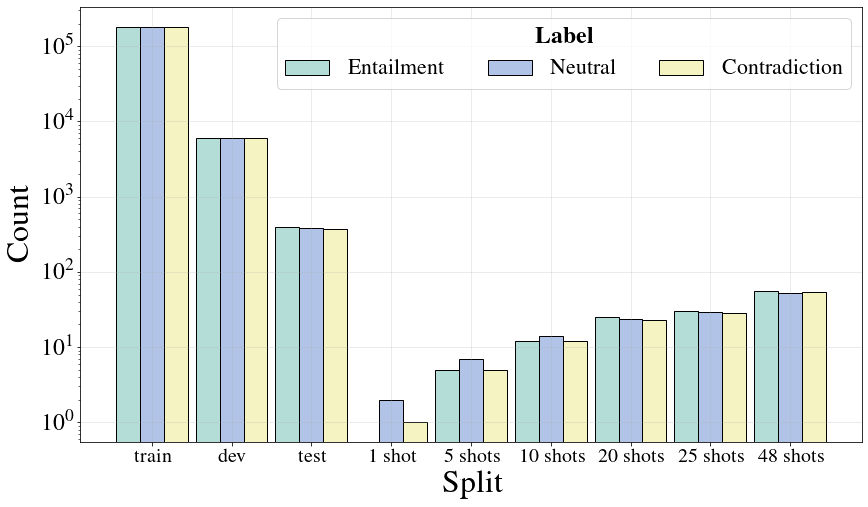

In [106]:
f, ax = plt.subplots(1, 1, figsize=(14,8))

colors = ['#b5ddd8', '#b1c4e7', '#f5f3c1']

width=0.3
ix = 0
label = list(label2counts.keys())[ix]
ax.bar([ix-width for ix in range(len(xs))], label2counts[label],  edgecolor='k', width=width, color=colors[ix], label=label.capitalize())
ix = 1
label = list(label2counts.keys())[ix]
ax.bar([ix for ix in range(len(xs))], label2counts[label],  edgecolor='k', width=width, color=colors[ix], label=label.capitalize())
ix = 2
label = list(label2counts.keys())[ix]
ax.bar([ix+width for ix in range(len(xs))], label2counts[label],  edgecolor='k', width=width, color=colors[ix], label=label.capitalize())

ax.grid(alpha=0.3)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xticks([ix for ix in range(len(xs))])
ax.set_xticklabels(xs, fontsize=20)
ax.set_xlabel('Split', fontsize=32)
ax.set_ylabel('Count', fontsize=32)
ax.set_yscale("log")
ax.legend(title='\\textbf{Label}', loc='upper right', ncol=3, fontsize=22, title_fontsize=24)

f.savefig("xvnli-labels.pdf", bbox_anchor="tight")

## Hypotheses length distribution

In [94]:
dev[0]

{'Flikr30kID': '4971935706',
 'annotator_labels': ['neutral'],
 'captionID': '4971935706.jpg#0',
 'gold_label': 'neutral',
 'pairID': '4971935706.jpg#0r1n',
 'sentence1': 'A older man and two boys (both wearing orange) are sitting, with feet dangling, over an alligator infested reservoir.',
 'sentence1_binary_parse': '( ( ( ( ( A ( older man ) ) and ) ( two boys ) ) ( -LRB- ( ( both ( wearing orange ) ) -RRB- ) ) ) ( ( are ( ( ( sitting , ) ( with feet ) ) ( ( dangling , ) ( over ( an ( alligator ( infested reservoir ) ) ) ) ) ) ) . ) )',
 'sentence1_parse': '(ROOT (S (NP (NP (NP (DT A) (JJR older) (NN man)) (CC and) (NP (CD two) (NNS boys))) (PRN (-LRB- -LRB-) (NP (DT both) (S (VP (VBG wearing) (NP (NN orange))))) (-RRB- -RRB-))) (VP (VBP are) (VP (VBG sitting) (, ,) (PP (IN with) (NP (NNS feet))) (S (VP (VBG dangling) (, ,) (PP (IN over) (NP (DT an) (NN alligator) (NN infested) (NN reservoir))))))) (. .)))',
 'sentence2': 'The man and his sons are fishing off a bridge.',
 'sentence2_

In [95]:
train_lens = [len(e['sentence2']) for e in train]
dev_lens = [len(e['sentence2']) for e in dev]
lang2test_lens = {lang: [len(e['sentence2']) for e in l] for lang, l in lang2test.items()}
lang2few_lens = {lang: {s: [len(e['sentence2']) for e in l] for s, l in d.items()} for lang, d in lang2few.items()}

In [100]:
from collections import Counter

train_cnts = Counter(train_lens)
dev_cnts = Counter(dev_lens)
lang2test_cnts = {lang: Counter(l) for lang, l in lang2test_lens.items()}

In [134]:
import numpy as np
from scipy import stats

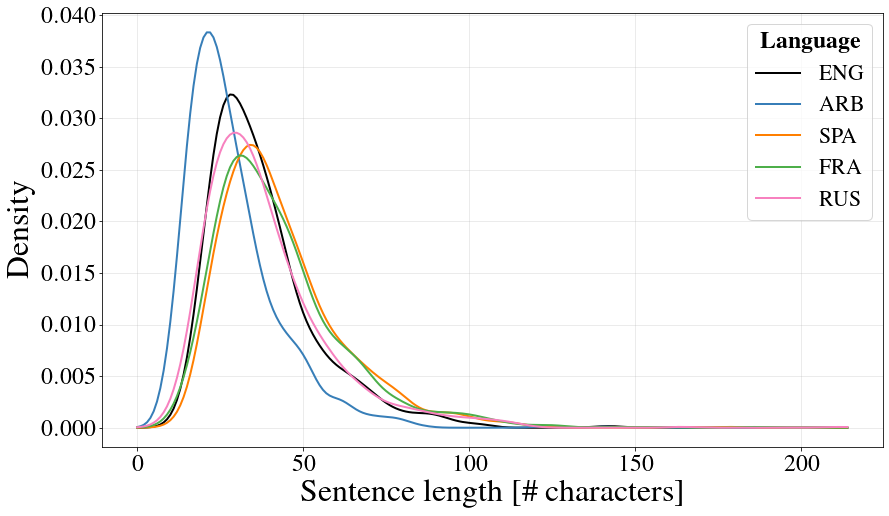

In [161]:
f, ax = plt.subplots(1, 1, figsize=(14,8))

colors = ['#000000', '#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00', '#cccccc']

x = np.arange(0, 215, 1)
for ix, (lang, l) in enumerate(lang2test_lens.items()):
    density = stats.kde.gaussian_kde(l)
    ax.plot(x, density(x), lw=2, label=lang2name[lang], color=colors[ix])

ax.grid(alpha=0.3)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xlabel('Sentence length [\# characters]', fontsize=32)
ax.set_ylabel('Density', fontsize=32)
ax.legend(title='\\textbf{Language}', loc='upper right', ncol=1, fontsize=22, title_fontsize=24)

f.savefig("xvnli-lens.pdf", bbox_anchor="tight")